## 1. Покрыть отрезки точками
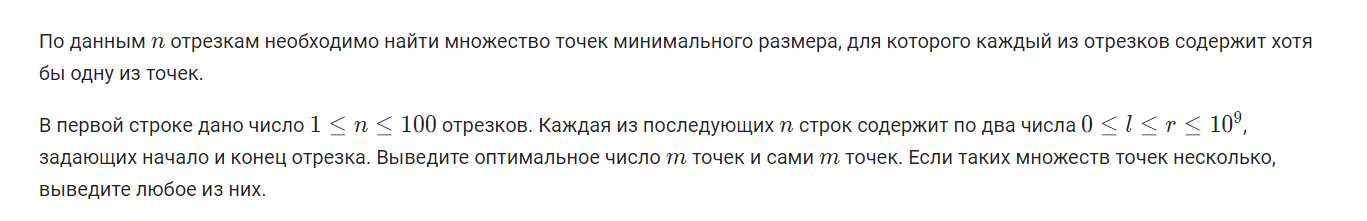

In [3]:
#читаю вход
lines = []
n = int(input())
for _ in range(n):
    l = tuple(map(int, input().split()))
    lines.append(l)

3
1 3
2 5
3 6


In [57]:
def cover_points(lines):
    points = []
    sorted_lines = sorted(lines, key=lambda x: x[1])
    
    while len(sorted_lines) > 0:
        point = sorted_lines.pop(0)[1]
        points.append(point)
        
        while (len(sorted_lines) > 0) and (point >= sorted_lines[0][0]) and (point <= sorted_lines[0][1]):
            sorted_lines.pop(0)[1]
            
    return points

#вывожу результат
res = cover_points(lines)

print(len(res))
print(' '.join(map(str, res)))

1
3


In [58]:
#тест
assert cover_points([(1, 3), (2, 5), (3, 6)]) == [3]
assert cover_points([(4, 7), (1, 3), (2, 5), (5, 6)]) == [3, 6]

## 2. Непрерывный рюкзак
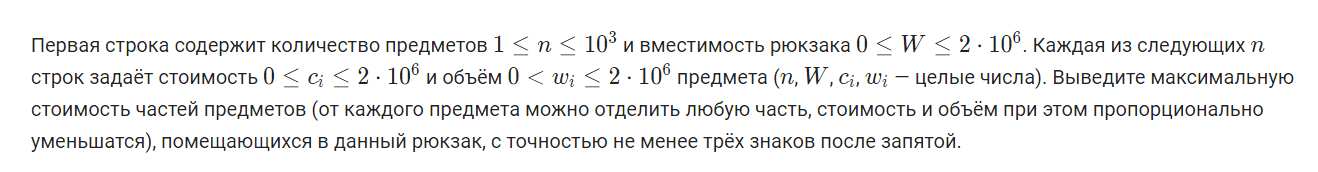

In [59]:
#читаю вход
items = []
n, W = map(int, input().split())

for _ in range(n):
    item = list(map(int, input().split()))
    #сразу считаю цену
    price = item[0]/item[1]
    item.append(price)
    
    items.append(item)

3 50
60 20
100 50
120 30


In [ ]:
50

In [67]:
def fill_backpack(items):
    
    sorted_items = sorted(items, key=lambda x: x[2], reverse=True)
    parts_w = 0
    parts_value = 0
    
    for item in sorted_items:
        
        if item[1] + parts_w <= W:
            parts_value += item[0]
            parts_w += item[1]
        else:
            parts_value += (W - parts_w) * item[2]
            break
            
    return parts_value

In [68]:
assert fill_backpack([[60, 20, 3.0], [100, 50, 2.0], [120, 30, 4.0]]) == 180

In [71]:
fill_backpack([[60, 20, 3], [100, 50, 2.0], [120, 30, 4.0]])

180.0

## 3. Различные слагаемые
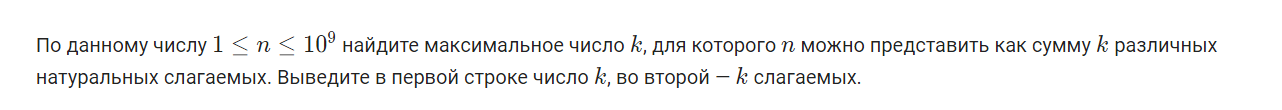

In [72]:
n = int(input())

4


In [115]:
def max_terms(n):
    
    summ = 0
    terms = []
    
    for term in range(1, n + 1):
        
        if ((n - summ - term) != 0) & ((n - summ - term) <= term):
            continue
        else:
            summ += term
            terms.append(term)
            
            if summ == n:
                return terms

In [118]:
assert max_terms(2) == [2]
assert max_terms(4) == [1, 3]
assert max_terms(6) == [1, 2, 3]

In [116]:
res = max_terms(1000000)

In [117]:
len(res)

1413

## 4. Кодирование Хаффмана
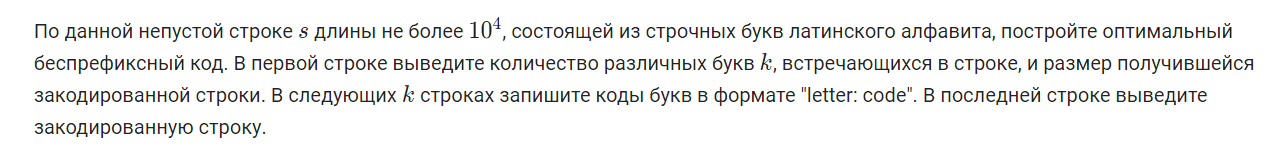

In [159]:
string = input()

abacabad


In [160]:
from collections import Counter, namedtuple
import heapq

In [174]:
class Node(namedtuple('Node', ['left', 'right'])):
    def walk(self, code, acc):
        self.left.walk(code, acc + "0")
        self.right.walk(code, acc + "1")
        
class Leaf(namedtuple('Leaf', ['char'])):
    def walk(self, code, acc):
#         if acc == '':
#             acc = '0'
        code[self.char] = acc

def huffman_encode(string):
    H = []
    for ch, freq in Counter(string).items():
        H.append((freq, len(H), Leaf(ch)))
        
    heapq.heapify(H)
    count = len(H)
    while len(H) > 1:
        freq_l, cnt_l, ch_l = heapq.heappop(H)
        freq_r, cnt_r, ch_r = heapq.heappop(H)
        node = (freq_l + freq_r, count, Node(ch_l, ch_r))
        print(node)
        heapq.heappush(H, node)
        count += 1

    [(freq, cnt, ch)] = H
    acc = ''
    code = {}
    ch.walk(code, acc)
    
    return code

def main():
    code_dict = huffman_encode(string)
    code = ''.join([code_dict[s] for s in string])
    print(f"{len(string)} {len(code)}")
    for lt, cd in code_dict.items():
        print(f"{lt}: {cd}")
    print(code)

In [175]:
main()

(2, 4, Node(left=Leaf(char='c'), right=Leaf(char='d')))
(4, 5, Node(left=Leaf(char='b'), right=Node(left=Leaf(char='c'), right=Leaf(char='d'))))
(8, 6, Node(left=Leaf(char='a'), right=Node(left=Leaf(char='b'), right=Node(left=Leaf(char='c'), right=Leaf(char='d')))))
8 14
a: 0
b: 10
c: 110
d: 111
01001100100111


In [5]:
assert test('a') == '0'
assert test('aaa') == '000'
assert test('abacabad') == '01001100100111'

## 5. Декодирование Хаффмана
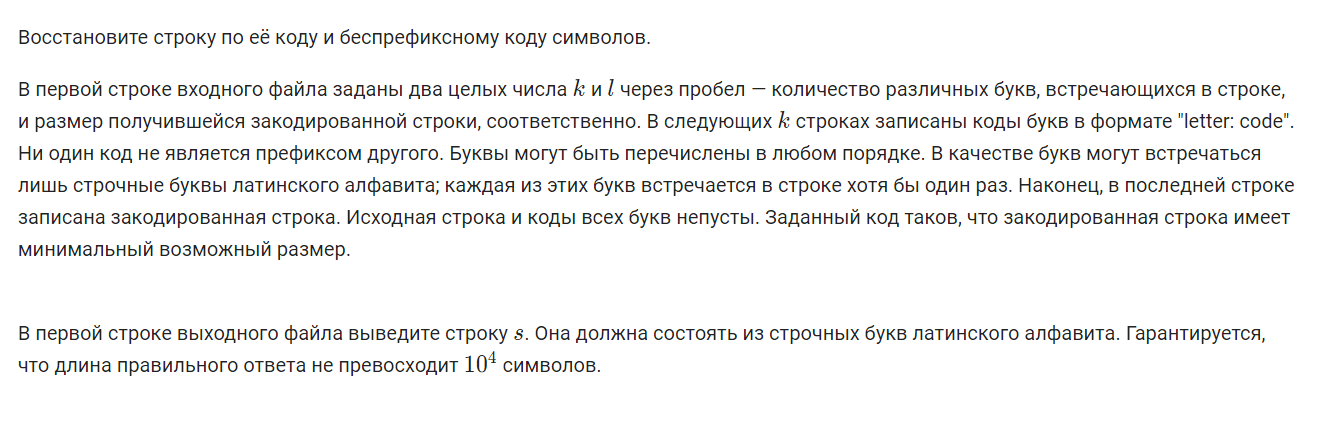

In [4]:
k, l = map(int, input().split())
code_dict = {}
for _ in range(k):
    el, code = input().split(': ')
    code_dict[el] = code
encoded_string = input()

4 14
a: 0
b: 10
c: 110
d: 111
01001100100111


In [12]:
code_dict

{'a': '0', 'b': '10', 'c': '110', 'd': '111'}

In [6]:
encoded_string

'01001100100111'

In [17]:
def huffman_decoder(encoded_string, code_dict):
    
    dict_to_encode = {v: k for k, v in code_dict.items()}
    acc = ''
    string = ''
    
    for i in encoded_string:
        acc += i
        letter = dict_to_encode.get(acc)
        if letter:
            string += letter
            acc = ''
            
    return string

In [19]:
assert huffman_decoder(encoded_string, code_dict) == 'abacabad'
assert huffman_decoder('0', {'a':'0'}) == 'a'

## 6. Очередь с приоритетами
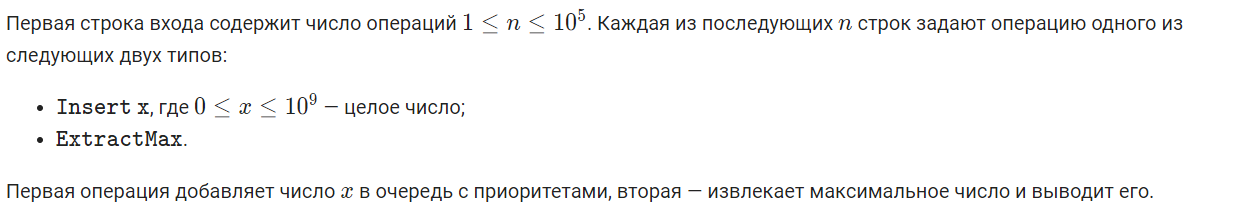

In [ ]:
import heapq
tree = []
heapq.heapify(tree)

n = int(input())

for _ in range(n):
    command = input()
    if 'Insert' in command:
        w, d = command.split()
        d = -1 * int(d)
        heapq.heappush(tree, d)
        
    if 'ExtractMax' in command:
        pop = heapq.heappop(tree)
        print(-1 * pop)